<a href="https://colab.research.google.com/github/pravallika-1305/WISE_ML/blob/main/performance_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
df = pd.read_csv('/content/drive/My Drive/Data/Wine.csv', names = ['class','Alcohol','MalicAcid','Ash','AshAlcalinity','Magnesium','Phenol','Flavanoid','NonFlavanoid','Proanthocyanins','ColorIntensity','Hue','DilutedWines','Proline'])

In [135]:
df.head()

,class,Alcohol,MalicAcid,Ash,AshAlcalinity,Magnesium,Phenol,Flavanoid,NonFlavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [136]:
df['class'].unique()

array([1, 2, 3])

In [137]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [138]:
X.head()

,Alcohol,MalicAcid,Ash,AshAlcalinity,Magnesium,Phenol,Flavanoid,NonFlavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [140]:
# Spot-Check Algorithms (Classification)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Spot-Check Ensemble Models (Classification)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier

## **K-Fold Cross validation**

In [141]:
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB',XGBClassifier()))

# evaluate each model in turn
num_folds = 10
seed = 10
results = {}
accuracy = {}
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results[name] = (cv_results.mean(), cv_results.std())
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy[name] = accuracy_score(y_test, pred)

In [142]:
results

{'AB': (0.9223809523809525, 0.08123340577097535),
 'CART': (0.9504761904761905, 0.045535364144312085),
 'ET': (0.9723809523809525, 0.04511512107553146),
 'GBM': (0.9371428571428572, 0.066284619585925),
 'KNN': (0.6561904761904762, 0.09262608615684187),
 'LDA': (0.9719047619047618, 0.046969377779353144),
 'NB': (0.9647619047619047, 0.04758093713065447),
 'RF': (0.9790476190476192, 0.032028898515809964),
 'SVM': (0.6285714285714286, 0.11959872438819508),
 'XGB': (0.9438095238095239, 0.04258112172592031)}

In [143]:
accuracy

{'AB': 0.9166666666666666,
 'CART': 0.9444444444444444,
 'ET': 0.9722222222222222,
 'GBM': 0.9444444444444444,
 'KNN': 0.7222222222222222,
 'LDA': 1.0,
 'NB': 1.0,
 'RF': 1.0,
 'SVM': 0.8055555555555556,
 'XGB': 0.9722222222222222}

## **Confusion Matrix**

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



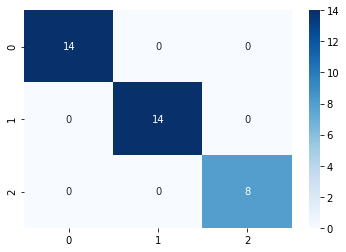

In [144]:
model = ExtraTreesClassifier(random_state=seed)

model.fit(X_train, y_train) 
y_predict = model.predict(X_test)
pred_prob = model.predict_proba(X_test)

print(classification_report(y_test, y_predict))
#diagonals are TPs of a class
#sum of class row cells is FNs
#sum of class col cells is FPs
#TNs of a class are all cells sum except the class col & row
#total test_examples = TP + FN
#Precision is defined as The ratio of correct positive predictions to the total predicted positives.(TP / TP + FP)
#Recall is defined as The ratio of correct positive predictions to the total positives examples.(TP / TP + FN)
#Specificity is defined as the ratio of correct negative predictions to the total negative examples. (TN / TN + FP )
#Accuracy is defined as the ratio of correctly predicted examples by the total examples. (TP + TN / TP + TN + FP + FN)
# F1 score is 2 * (precison * recall / precision + recall), to overcome the tradeoff between precision and recall.
cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True,cmap="Blues")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


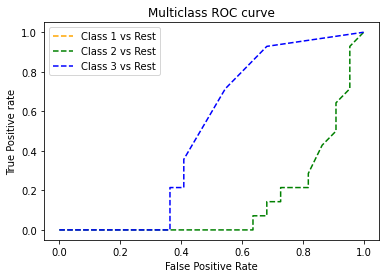

In [156]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3
roc = {}

    
for i in range(len(df['class'].unique())):  
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  